In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [32]:
V = 42
E = 87
read_country = open("europe.txt")
read_edges = open("dist.txt")
matrix = [[0] * V for i in range(V)]
country = []  
edges = []  
G = nx.Graph()  

In [33]:
for i in range(V):
    pars_one = read_country.readline().split('.')
    num, name = pars_one[0], pars_one[1][:-1]
    country.append(name)

for i in range(E):
    pars_two = read_edges.readline().split()
    a, b = int(pars_two[0]), int(pars_two[1])
    matrix[a][b] = matrix[b][a] = 1
    edges.append([a, b])

In [34]:
for i in range(E):
    x, y = edges[i]
    G.add_edge(country[x], country[y])

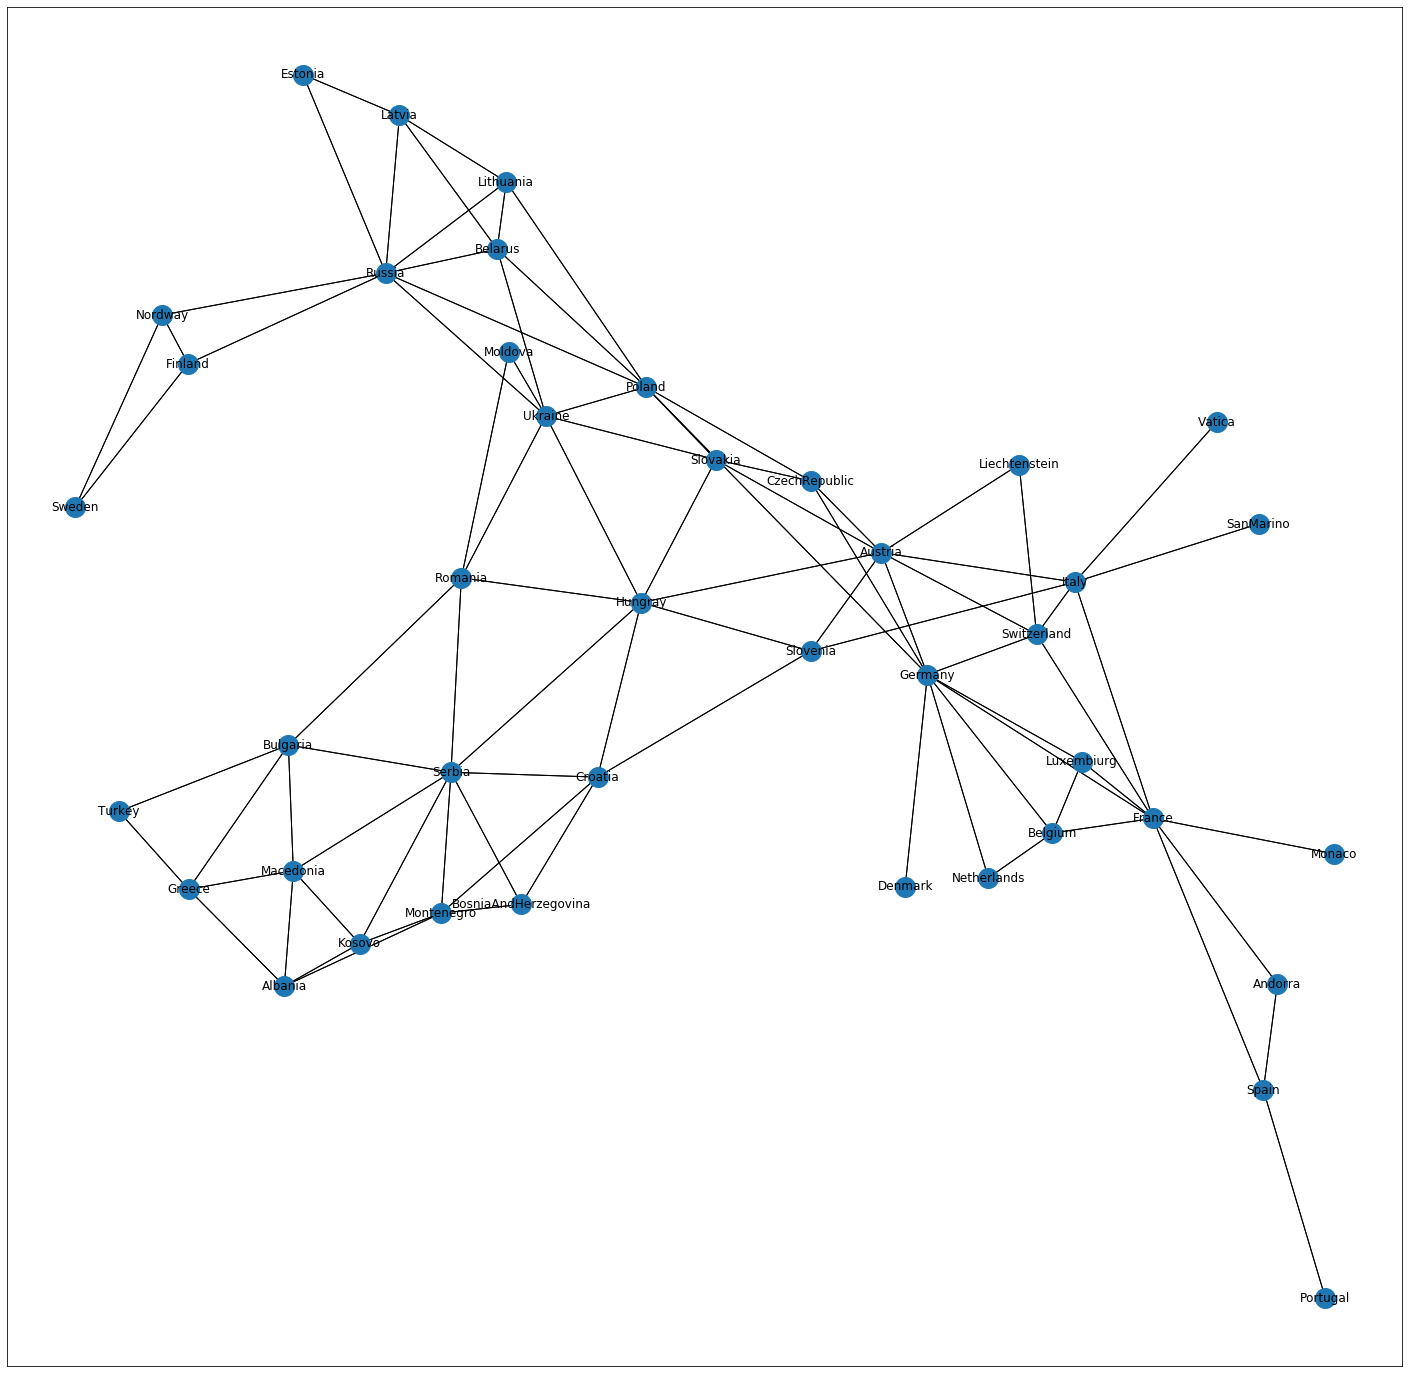

In [35]:
# drawing graph
plt.figure(figsize=(25, 25))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size=400)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()

In [7]:
#(b)
deg = [0] * V
for i in range(V):
    deg[i] = sum(matrix[i])

In [8]:
# Calculate the shortest distance using the Floyd-Warshall algorithm
dist = [[0] * V for i in range(V)]
inf = 10 ** 5
for i in range(V):
    for j in range(V):
        if matrix[i][j]:
            dist[i][j] = 1
        else:
            dist[i][j] = inf
#floyd
for k in range(V):
    for i in range(V):
        for j in range(V):
            dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

In [9]:
ext = [0] * V
for i in range(V):
    for j in range(V):
        ext[i] = max(ext[i], dist[i][j])

In [10]:
# finding rad, diam ,cent
rad = min(ext)
diam = max(ext)
center = []
for i in range(V):
    if ext[i] == rad:
        center.append(country[i])

In [36]:
print('max_deg =', max(deg))
print('min_deg =', min(deg))
print('radius = ', rad)
print('diameter = ', diam)
print('center = ', center)

max_deg = 9
min_deg = 1
radius =  5
diameter =  8
center =  ['Austria', 'Belarus', 'Croatia', 'CzechRepublic', 'Germany', 'Hungray', 'Poland', 'Russia', 'Slovakia', 'Slovenia', 'Switzerland', 'Ukraine']
